<a href="https://colab.research.google.com/github/sanika-3103/695650-UCT5P207/blob/main/Societe_hacakthon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import random
import string

# Generate more company names (you can add more as needed)
company_names = ['Company A', 'Company B', 'Company C', 'Company D', 'Company E', 'Company F', 'Company G', 'Company H', 'Company I', 'Company J']

# Create a larger and more detailed dummy financial dataset with 1000 rows
financial_data = pd.DataFrame({
    'company_name': random.choices(company_names, k=1000),
    'revenue': [random.randint(1000000, 5000000) for _ in range(1000)],
    'profit': [random.randint(100000, 500000) for _ in range(1000)],
    'market_cap': [random.randint(10000000, 50000000) for _ in range(1000)],
    'debt': [random.randint(500000, 2000000) for _ in range(1000)],
    'employees': [random.randint(50, 1000) for _ in range(1000)],
    'industry': random.choices(['Technology', 'Finance', 'Healthcare', 'Energy', 'Retail'], k=1000),
    'founded_year': [random.randint(1970, 2020) for _ in range(1000)],
})

# Create a larger and more detailed dummy ESG dataset with 1000 rows
esg_data = pd.DataFrame({
    'company_name': random.choices(company_names, k=1000),
    'esg_score': [random.uniform(0, 100) for _ in range(1000)],
    'social_score': [random.uniform(0, 100) for _ in range(1000)],
    'governance_score': [random.uniform(0, 100) for _ in range(1000)],
    'carbon_footprint': [random.uniform(0, 1000) for _ in range(1000)],
    'employee_diversity': [random.uniform(0, 100) for _ in range(1000)],
    'green_initiatives': [random.choice(['Yes', 'No']) for _ in range(1000)],
    'community_involvement': [random.choice(['High', 'Medium', 'Low']) for _ in range(1000)],
})

# Save the larger and more detailed dummy datasets as .csv files
financial_data.to_csv('large_financial_data.csv', index=False)
esg_data.to_csv('large_esg_data.csv', index=False)

# Calculate the holistic ESG score
financial_data['esg_weight'] = [random.uniform(0, 1) for _ in range(1000)]
financial_data['social_weight'] = [random.uniform(0, 1) for _ in range(1000)]
financial_data['governance_weight'] = [random.uniform(0, 1) for _ in range(1000)]

merged_data = pd.merge(financial_data, esg_data, on='company_name')

# Calculate holistic ESG score
merged_data['esg_score_weighted'] = (
    (merged_data['esg_score'] * merged_data['esg_weight']) +
    (merged_data['social_score'] * merged_data['social_weight']) +
    (merged_data['governance_score'] * merged_data['governance_weight'])
)

# Print the modified merged dataset with the holistic ESG score
print(merged_data.head())


  company_name  revenue  profit  market_cap     debt  employees    industry  \
0    Company B  1333278  343782    31822014  1974715         87  Technology   
1    Company B  1333278  343782    31822014  1974715         87  Technology   
2    Company B  1333278  343782    31822014  1974715         87  Technology   
3    Company B  1333278  343782    31822014  1974715         87  Technology   
4    Company B  1333278  343782    31822014  1974715         87  Technology   

   founded_year  esg_weight  social_weight  governance_weight  esg_score  \
0          2010    0.242221        0.38548           0.950198  25.747070   
1          2010    0.242221        0.38548           0.950198  72.319077   
2          2010    0.242221        0.38548           0.950198  41.354865   
3          2010    0.242221        0.38548           0.950198  88.783413   
4          2010    0.242221        0.38548           0.950198  92.546869   

   social_score  governance_score  carbon_footprint  employee_divers

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Define columns to normalize
numerical_columns = ['revenue', 'profit', 'market_cap', 'debt', 'employees', 'esg_score', 'social_score', 'governance_score', 'carbon_footprint', 'employee_diversity']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize numerical columns
merged_data[numerical_columns] = scaler.fit_transform(merged_data[numerical_columns])


In [29]:
# Define weights for ESG components
esg_weights = {'esg_score': 0.4, 'social_score': 0.3, 'governance_score': 0.3}

# Calculate the aggregated ESG score
merged_data['aggregated_esg_score'] = (
    merged_data['esg_score'] * esg_weights['esg_score'] +
    merged_data['social_score'] * esg_weights['social_score'] +
    merged_data['governance_score'] * esg_weights['governance_score']
)


In [30]:
# Calculate P/E ratio
merged_data['pe_ratio'] = merged_data['market_cap'] / merged_data['profit']

# Calculate Debt-to-Equity ratio
merged_data['debt_equity_ratio'] = merged_data['debt'] / merged_data['market_cap']


In [31]:
# Calculate Valuation Score (Example)
merged_data['valuation_score'] = (
    (1 - merged_data['pe_ratio']) +  # Higher P/E is penalized
    (1 - merged_data['debt_equity_ratio'])  # Lower Debt-to-Equity is rewarded
)


In [32]:
# Define a function for recommendation
def get_recommendation(valuation_score):
    if valuation_score >= 1.5:
        return 'Buy'
    elif valuation_score >= 1.0:
        return 'Hold'
    else:
        return 'Sell'

# Apply recommendation function
merged_data['recommendation'] = merged_data['valuation_score'].apply(get_recommendation)


In [33]:
merged_data.to_csv('final_investment_data.csv', index=False)


In [34]:
import pandas as pd

# Load the final investment data
investment_data = pd.read_csv('final_investment_data.csv')

# Step 1: Screening Companies based on ESG Score
# Define a threshold for ESG score (customize based on strategy)
esg_threshold = 0.5

# Filter companies with ESG scores above the threshold
selected_companies = investment_data[investment_data['aggregated_esg_score'] > esg_threshold]

# Step 2: Fundamental Analysis
# Define fundamental analysis metrics (customize based on strategy)
pe_ratio_threshold = 1.5
debt_equity_threshold = 0.5

# Filter companies based on fundamental analysis criteria
selected_companies = selected_companies[
    (selected_companies['pe_ratio'] < pe_ratio_threshold) &
    (selected_companies['debt_equity_ratio'] < debt_equity_threshold)
]

# Step 3: Valuations
# Define valuation-based criteria (customize based on strategy)
buy_threshold = 1.5
hold_threshold = 1.0

# Create a new column for recommendations
selected_companies['recommendation'] = 'Hold'

# Update recommendations based on valuation
selected_companies.loc[selected_companies['valuation_score'] >= buy_threshold, 'recommendation'] = 'Buy'
selected_companies.loc[selected_companies['valuation_score'] < hold_threshold, 'recommendation'] = 'Sell'

# Step 4: Generating Investment Recommendations Report
# Create an investment recommendations report
investment_report = selected_companies[['company_name', 'aggregated_esg_score', 'pe_ratio', 'debt_equity_ratio', 'valuation_score', 'recommendation']]

# Save the investment recommendations report to a CSV file
investment_report.to_csv('investment_recommendations.csv', index=False)

# Print the first few rows of the investment recommendations report
print(investment_report.head())


     company_name  aggregated_esg_score  pe_ratio  debt_equity_ratio  \
1501    Company B              0.747319  0.890207           0.284719   
1504    Company B              0.596381  0.890207           0.284719   
1507    Company B              0.561931  0.890207           0.284719   
1508    Company B              0.665193  0.890207           0.284719   
1509    Company B              0.626233  0.890207           0.284719   

      valuation_score recommendation  
1501         0.825073           Sell  
1504         0.825073           Sell  
1507         0.825073           Sell  
1508         0.825073           Sell  
1509         0.825073           Sell  


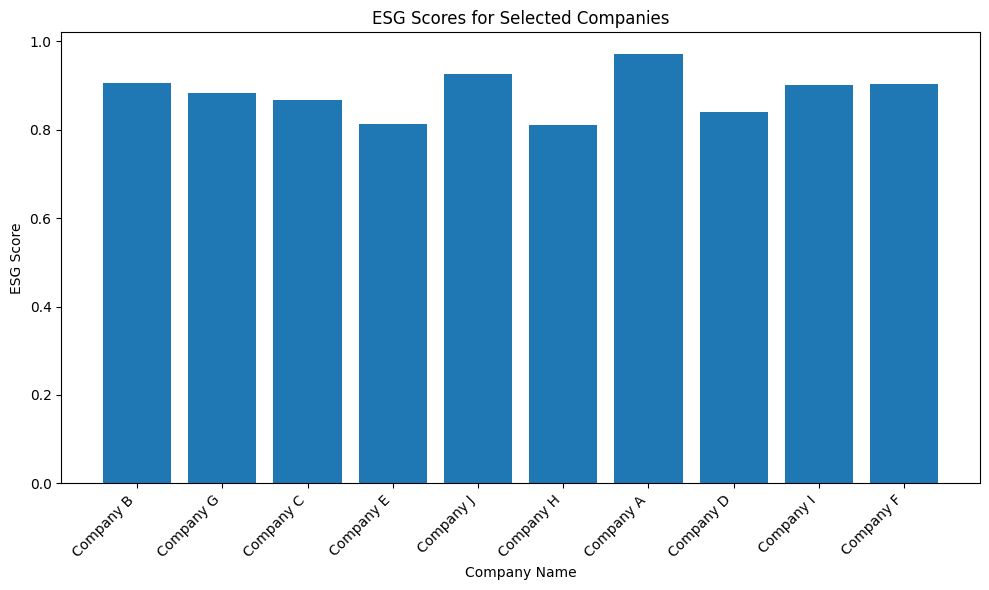

In [35]:
import matplotlib.pyplot as plt

# Example: Create a bar chart of ESG scores for selected companies
plt.figure(figsize=(10, 6))
plt.bar(selected_companies['company_name'], selected_companies['aggregated_esg_score'])
plt.title('ESG Scores for Selected Companies')
plt.xlabel('Company Name')
plt.ylabel('ESG Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


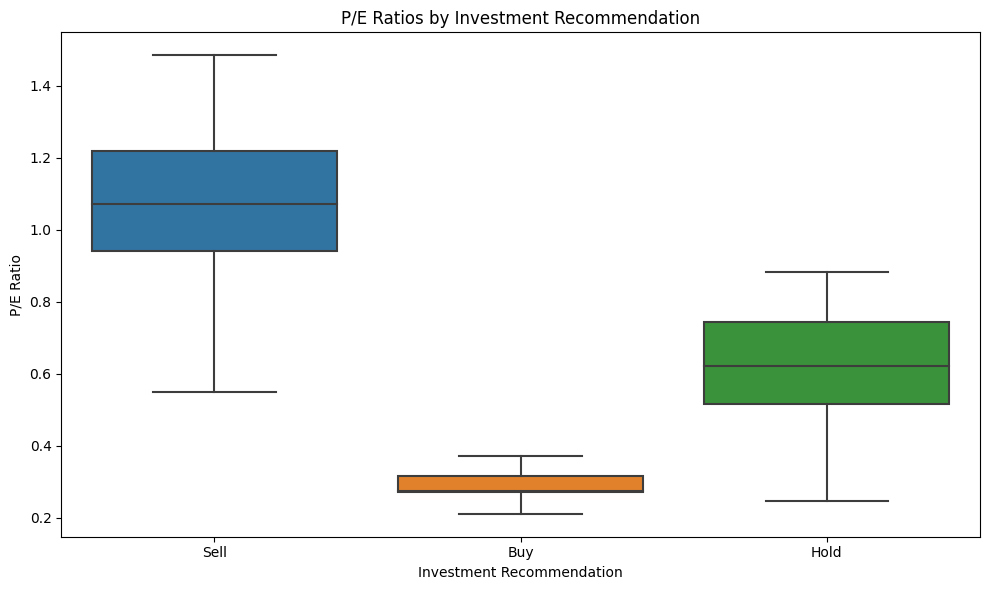

In [36]:
import seaborn as sns

# Example: Create a box plot of P/E ratios for selected companies
plt.figure(figsize=(10, 6))
sns.boxplot(data=selected_companies, x='recommendation', y='pe_ratio')
plt.title('P/E Ratios by Investment Recommendation')
plt.xlabel('Investment Recommendation')
plt.ylabel('P/E Ratio')
plt.tight_layout()
plt.show()
